In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mt

In [2]:
df  = pd.read_csv('../data/cdc_sex_age_state_filtered.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,Alabama,Male,0,6.0,260.0,2.0,0.0,2.0,4.0
1,Alabama,Male,1,0.0,57.0,0.0,0.0,0.0,0.0
2,Alabama,Male,5,0.0,76.0,3.0,0.0,0.0,5.0
3,Alabama,Male,15,6.0,644.0,1.0,4.0,1.0,13.0
4,Alabama,Male,25,41.0,1115.0,37.0,14.0,2.0,66.0


In [3]:
summary_df = df.groupby('Sex').agg(np.sum)
prob_df = summary_df.apply(lambda x : x/summary_df['Total Deaths'])

In [4]:
prob_df

,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Sex,,,,,,,
Female,0.010937,0.122976,1.0,0.103974,0.055993,0.002453,0.172906
Male,0.009916,0.135344,1.0,0.120319,0.069643,0.002330,0.187814


In [5]:
prob_df.columns

Index(['Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

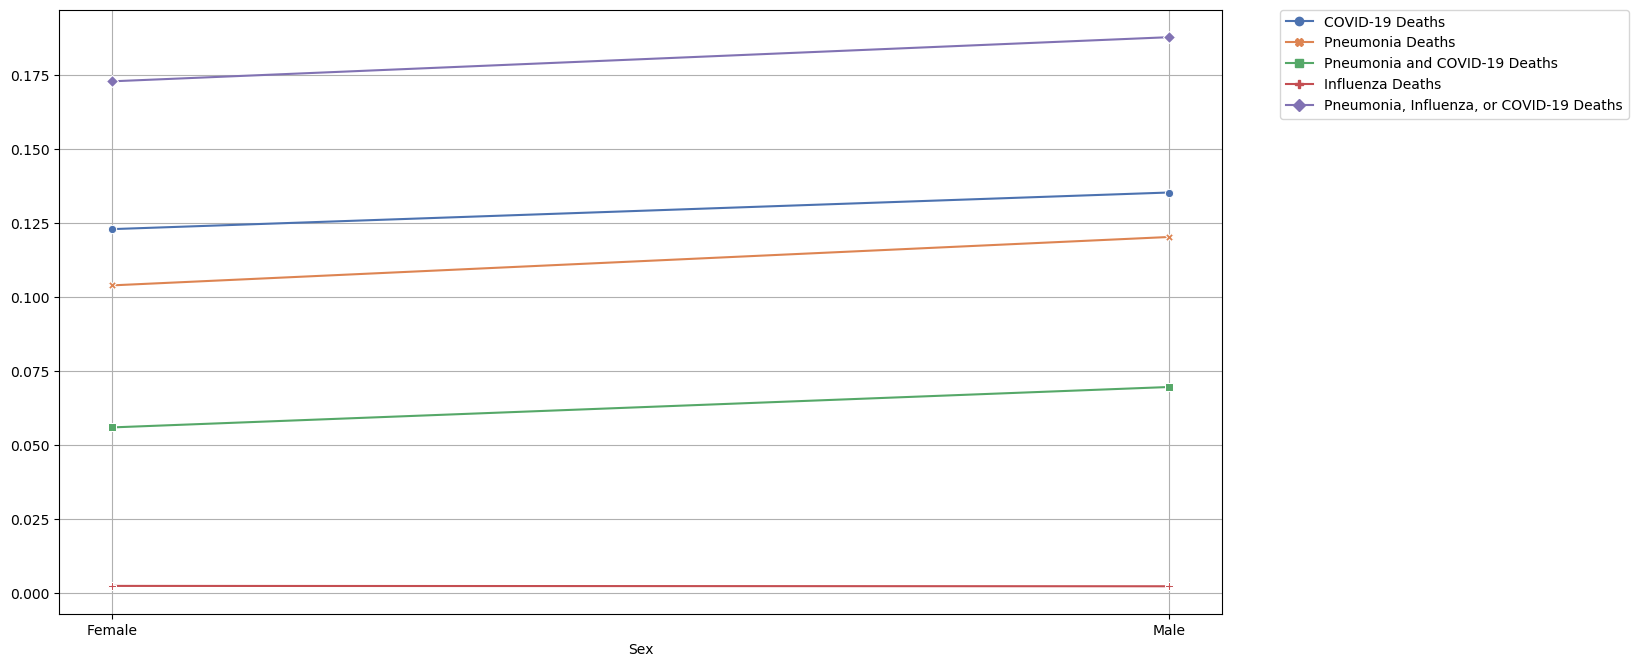

In [17]:
plt.figure(figsize= (15, 8))
sns.lineplot(data= prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],   markers=True, dashes=False,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.savefig('../figures/gender_lineplot.jpg',bbox_inches='tight')

In [7]:
import importlib
importlib.reload(mt); importlib.reload(plt); importlib.reload(sns)

<module 'seaborn' from 'C:\\Users\\adity\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

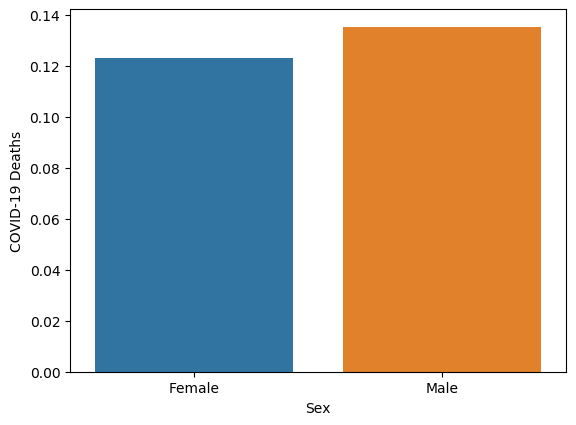

In [8]:
sns.barplot(x = prob_df.index,y = 'COVID-19 Deaths', data = prob_df)

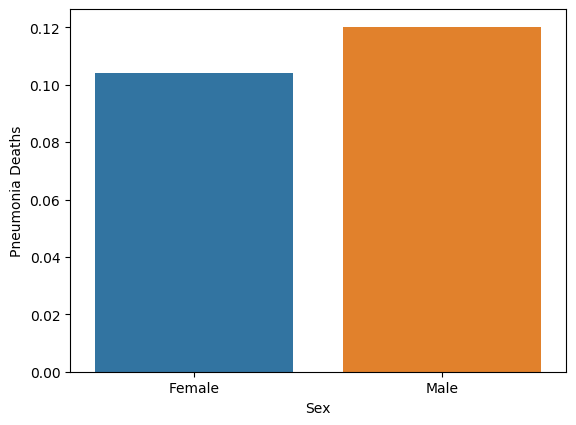

In [9]:
sns.barplot(x = prob_df.index,y = 'Pneumonia Deaths', data = prob_df)


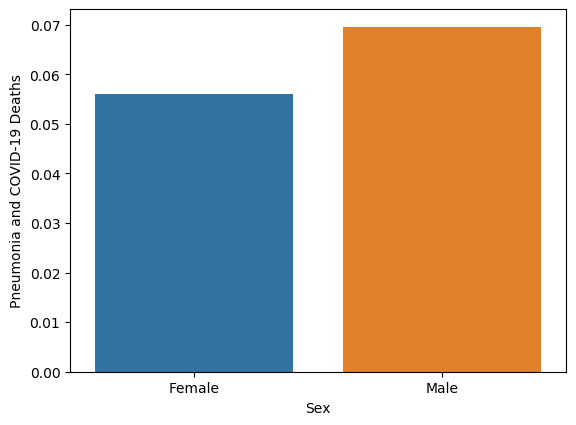

In [10]:
sns.barplot(x = prob_df.index,y = 'Pneumonia and COVID-19 Deaths', data = prob_df)

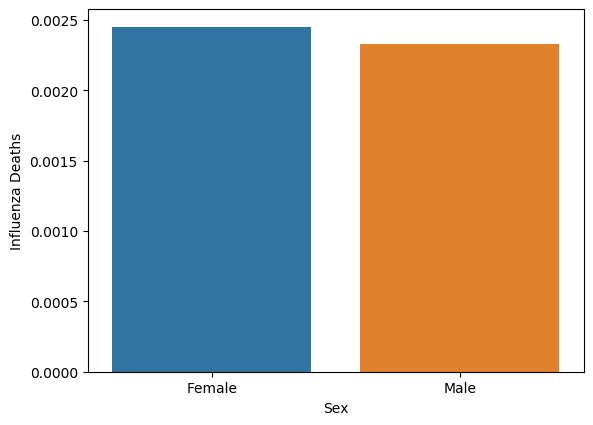

In [11]:
sns.barplot(x = prob_df.index,y = 'Influenza Deaths', data = prob_df)

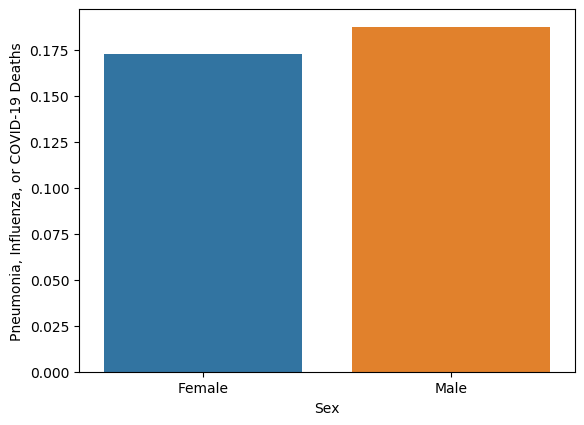

In [12]:
sns.barplot(x = prob_df.index,y = 'Pneumonia, Influenza, or COVID-19 Deaths', data = prob_df)

In [13]:
age_summary_df = df.groupby('Age Group').agg(np.sum)
age_prob_df = age_summary_df.apply(lambda x : x/age_summary_df['Total Deaths'])

In [14]:
age_prob_df

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Age Group,,,,,,
0,0.007501,1.0,0.017235,0.001161,0.004108,0.018441
1,0.029903,1.0,0.076751,0.007227,0.046599,0.095689
5,0.029077,1.0,0.052615,0.008462,0.034923,0.069231
15,0.020071,1.0,0.021397,0.009184,0.004758,0.035788
25,0.039808,1.0,0.039110,0.018801,0.004480,0.063443
35,0.072856,1.0,0.064940,0.034580,0.003537,0.105799
45,0.110170,1.0,0.096021,0.056452,0.003587,0.152710
55,0.121092,1.0,0.112174,0.064483,0.003165,0.171437
65,0.141732,1.0,0.129151,0.075856,0.002348,0.197007


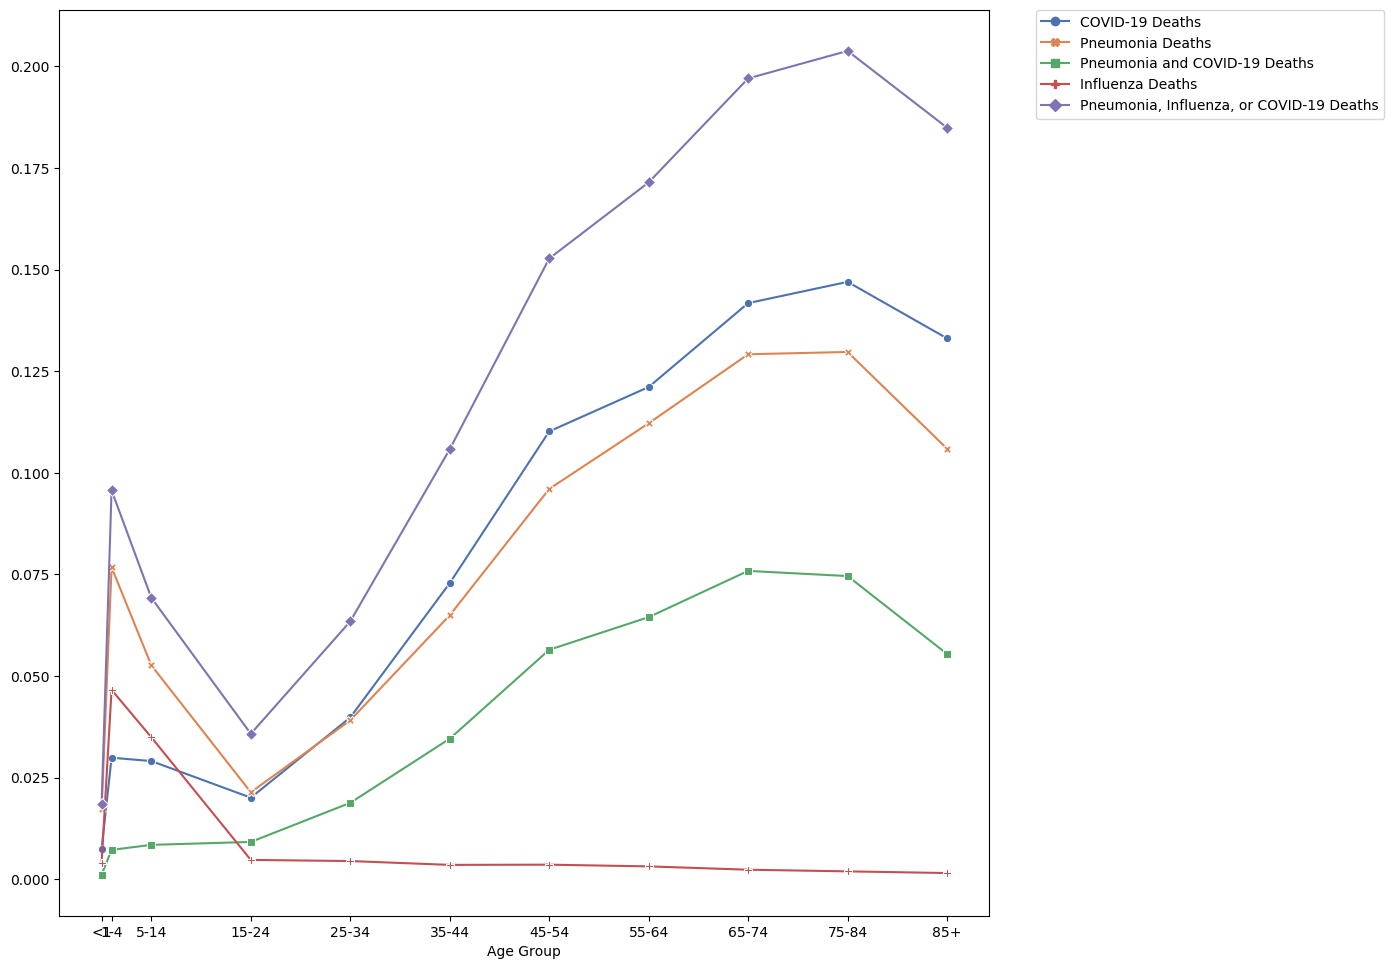

In [15]:
sns.set(rc = {'figure.figsize':(12,12)})
g = sns.lineplot(data= age_prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],markers=True, dashes=False)
g.set_xticks(df['Age Group'].unique())
g.set_xticklabels(["<1","1-4","5-14","15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [16]:
total_summary_df = df.groupby(['Sex','Age Group']).agg(np.sum)
total_prob_df = total_summary_df.apply(lambda x : x/total_summary_df['Total Deaths'])
total_prob_df

COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
Sex    Age Group                                                    
Female 0                 0.007277           1.0          0.016748   
       1                 0.022609           1.0          0.100870   
       5                 0.038023           1.0          0.066160   
       15                0.034004           1.0          0.031298   
       25                0.049645           1.0          0.052014   
       35                0.073095           1.0          0.071990   
       45                0.098953           1.0          0.096726   
       55                0.114203           1.0          0.113615   
       65                0.131340           1.0          0.121755   
       75                0.134252           1.0          0.115657   
       85                0.125817           1.0          0.092473   
Male   0                 0.007683           1.0          0.017630   
       1                 0.035402           1.0          0.058566   
       5                 0.022997           1.0          0.043411   
       15                0.015115           1.0          0.017874   
       25                0.035707           1.0          0.033731   
       35                0.072730           1.0          0.061227   
       45                0.116806           1.0          0.095604   
       55                0.125373           1.0          0.111279   
       65                0.149174           1.0          0.134447   
       75                0.158530           1.0          0.142513   
       85                0.144266           1.0          0.126748   

                  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Sex    Age Group                                                    
Female 0                               0.000399          0.004785   
       1                               0.007536          0.057391   
       5                               0.003042          0.042205   
       15                              0.015694          0.009471   
       25                              0.025211          0.007730   
       35                              0.034855          0.004676   
       45                              0.050816          0.004095   
       55                              0.062003          0.003551   
       65                              0.068925          0.002492   
       75                              0.064598          0.002057   
       85                              0.047365          0.001492   
Male   0                               0.001779          0.003558   
       1                               0.006993          0.038462   
       5                               0.012145          0.029974   
       15                              0.006867          0.003081   
       25                              0.016129          0.003125   
       35                              0.034436          0.002936   
       45                              0.059786          0.003287   
       55                              0.066023          0.002925   
       65                              0.080819          0.002245   
       75                              0.083685          0.001837   
       85                              0.067898          0.001585   

                  Pneumonia, Influenza, or COVID-19 Deaths  
Sex    Age Group                                            
Female 0                                          0.018941  
       1                                          0.110145  
       5                                          0.082890  
       15                                         0.054568  
       25                                         0.082896  
       35                                         0.113663  
       45                                         0.148539  
       55                                         0.168880  
       65                                         0.186333  
       75                        